In [6]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [8]:
df = pd.read_csv("Titanic-Dataset.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.isna().sum().sum().item()

866

In [12]:
df.duplicated().sum().item()

0

In [13]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.drop(columns = "Cabin", inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [19]:
df[df["Ticket"] == "113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [20]:
df.dropna(inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

,count
Survived,
0,549
1,340


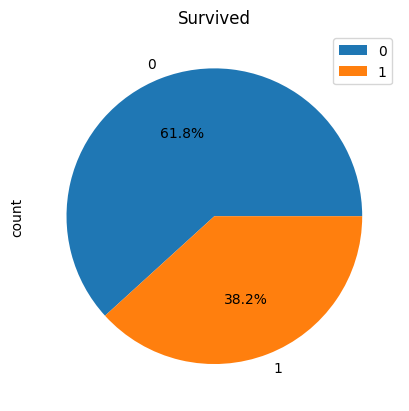

In [21]:
survived = df["Survived"].value_counts()

survived.plot(kind = "pie", autopct = "%1.1f%%", legend = True, title = "Survived")
pd.DataFrame(survived)

,count
Pclass,
3,491
1,214
2,184


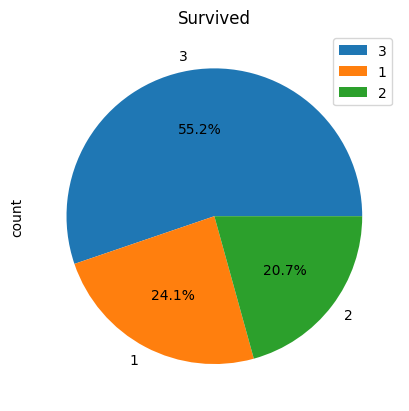

In [25]:
Pclass = df["Pclass"].value_counts()

Pclass.plot(kind = "pie", autopct = "%1.1f%%", legend = True, title = "Survived")
pd.DataFrame(Pclass)

,count
Sex,
male,577
female,312


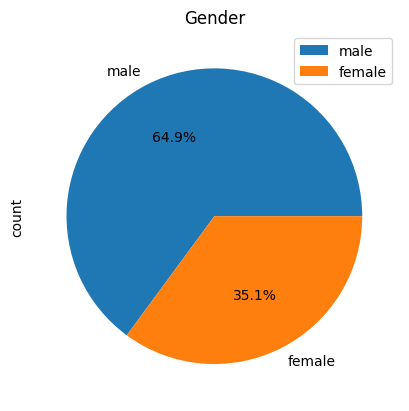

In [27]:
sex = df["Sex"].value_counts()

sex.plot(kind = "pie", autopct = "%1.1f%%", legend = True, title = "Gender")
pd.DataFrame(sex)

In [28]:
age = df["Age"]
pd.DataFrame(age.describe())

,Age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


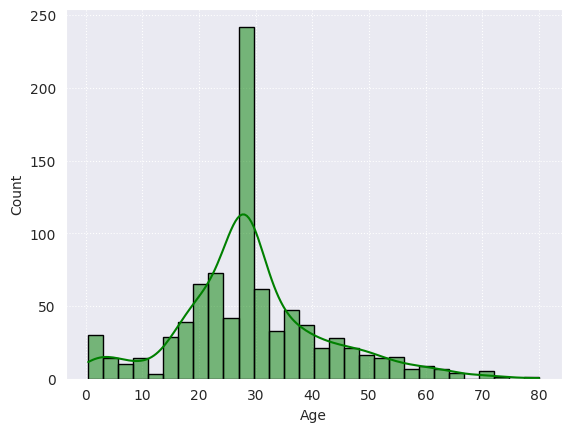

In [29]:
sns.set_style("darkgrid", {"gridcolor": "0.6", "grid.linestyle": ":"})
sns.histplot(age, kde = True, color = "green", edgecolor = "black")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick'

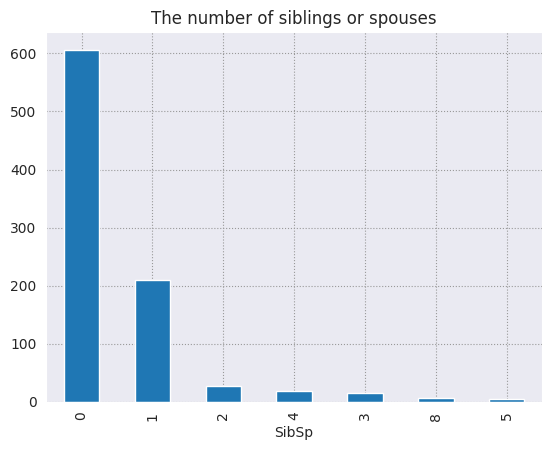

In [30]:
sibsp = df["SibSp"].value_counts()

sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})
sibsp.plot(kind = "bar", title = "The number of siblings or spouses")
plt.xtick(rotation = 0)
pd.DataFrame(sibsp)

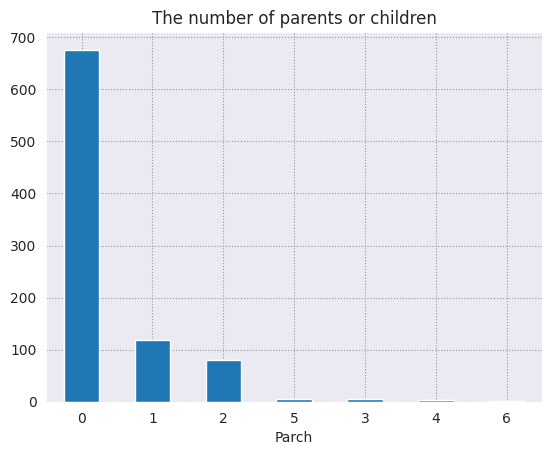

In [31]:
parch = df["Parch"].value_counts()

sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})
parch.plot(kind = "bar", title = "The number of parents or children")
plt.xticks(rotation = 0)
plt.show()

In [32]:
fare = df["Fare"]
pd.DataFrame(fare.describe())

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


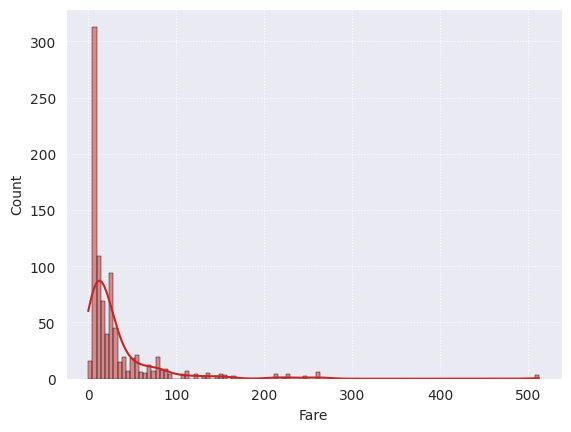

In [33]:
sns.set_style("darkgrid", {"gridcolor": "0.6", "grid.linestyle": ":"})
sns.histplot(fare, kde = True, color = "#C72525", edgecolor = "black")
plt.show()

,count
Embarked,
S,644
C,168
Q,77


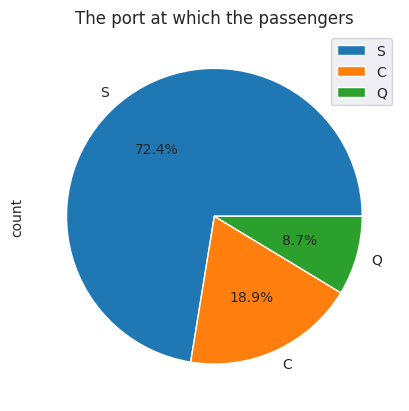

In [35]:
embarked = df['Embarked'].value_counts()

embarked.plot(kind='pie',autopct='%1.1f%%', legend=True, title='The port at which the passengers')
pd.DataFrame(embarked)


count
Survived Pclass       
0        3         372
         2          97
         1          80
1        1         134
         3         119
         2          87

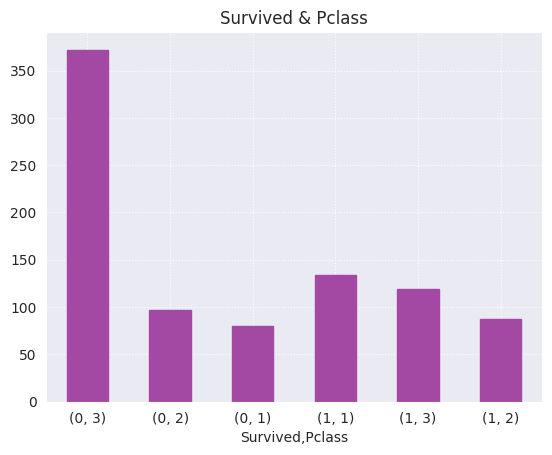

In [36]:
x = df.groupby(["Survived"])["Pclass"].value_counts()

x.plot(kind = "bar", color = "#A349A4", edgecolor = "#A349A4", title = "Survived & Pclass")
plt.xticks(rotation = 0)
pd.DataFrame(x)

count
Survived Sex          
0        male      468
         female     81
1        female    231
         male      109

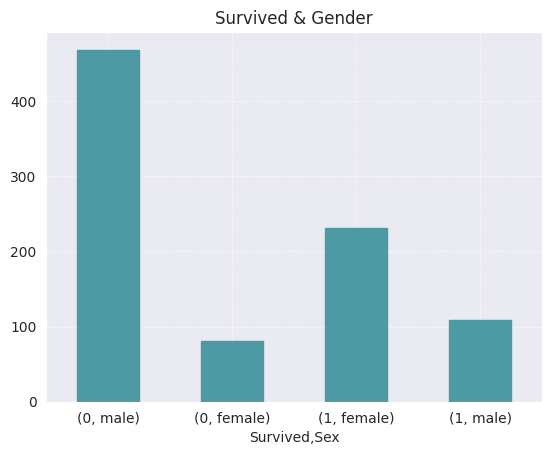

In [37]:
x = df.groupby(["Survived"])["Sex"].value_counts()

x.plot(kind = "bar", color = "#4D9AA4", edgecolor = "#4D9AA4", title = "Survived & Gender")
plt.xticks(rotation = 0)
pd.DataFrame(x)

In [38]:
x = df.groupby(["Survived"])["Age"]
pd.DataFrame(x.describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1,340.0,28.163735,13.672269,0.42,21.0,28.0,35.0,80.0


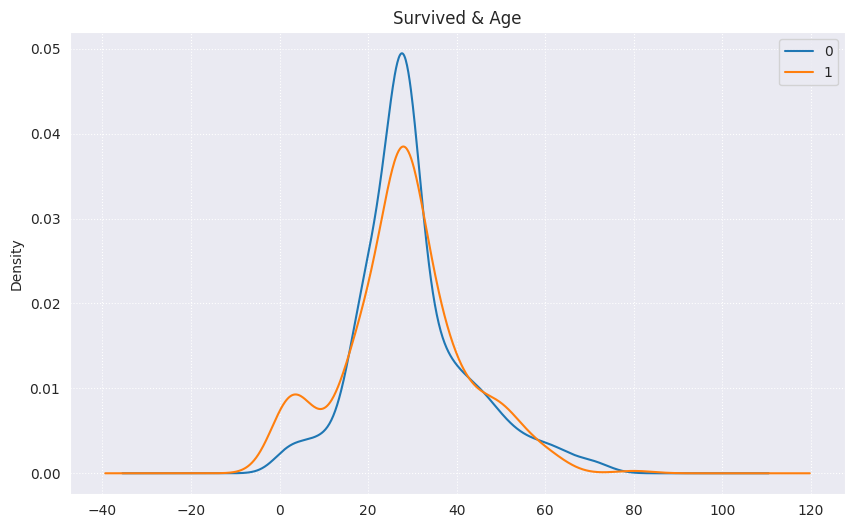

In [39]:
plt.figure(figsize = (10, 6))

x.plot(kind = "kde", legend = True, title = "Survived & Age")
plt.show()

count
Survived SibSp       
0        0        398
         1         97
         2         15
         4         15
         3         12
         8          7
         5          5
1        0        208
         1        112
         2         13
         3          4
         4          3

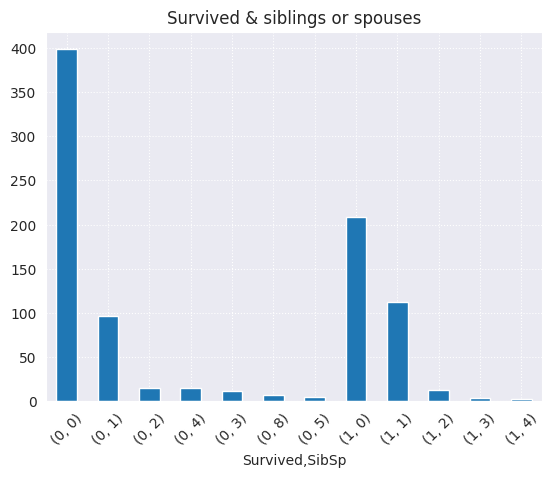

In [40]:
x = df.groupby(["Survived"])["SibSp"].value_counts()

x.plot(kind = "bar", title = "Survived & siblings or spouses")
plt.xticks(rotation = 45)
pd.DataFrame(x)

count
Survived Parch       
0        0        445
         1         53
         2         40
         4          4
         5          4
         3          2
         6          1
1        0        231
         1         65
         2         40
         3          3
         5          1

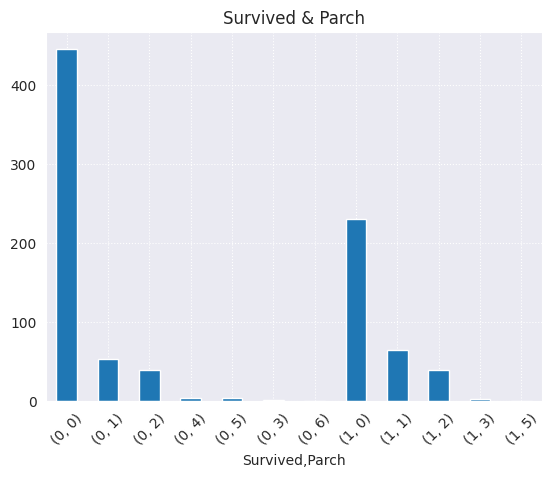

In [41]:
x = df.groupby(["Survived"])["Parch"].value_counts()

x.plot(kind = "bar", title = "Survived & Parch")
plt.xticks(rotation = 45)
pd.DataFrame(x)

In [42]:
x = df.groupby(["Survived"])["Fare"]
pd.DataFrame(x.describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.85420,10.5,26.0000,263.0000
1,340.0,48.209498,66.748773,0.0,12.44375,26.0,56.9469,512.3292


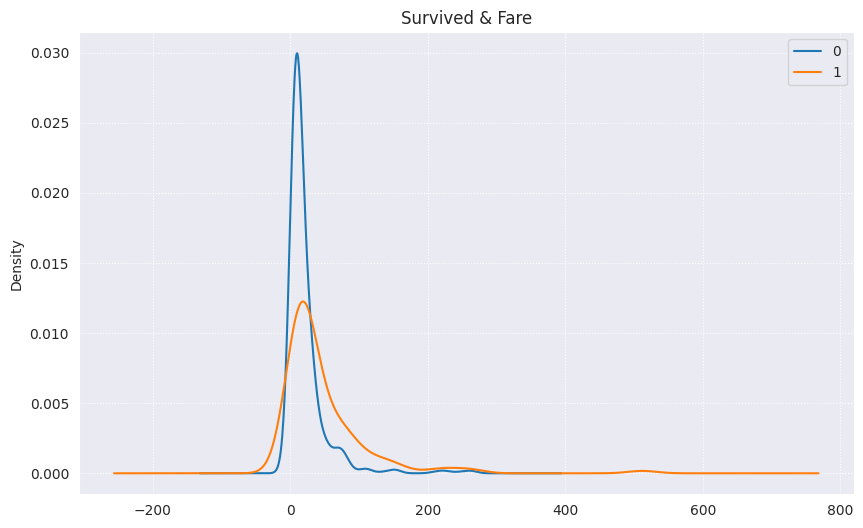

In [43]:
plt.figure(figsize = (10, 6))

x.plot(kind = "kde", legend = True, title = "Survived & Fare")
plt.show()

count
Survived Embarked       
0        S           427
         C            75
         Q            47
1        S           217
         C            93
         Q            30

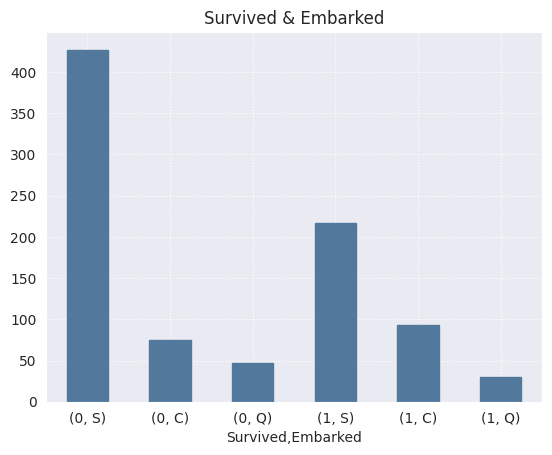

In [44]:
x = df.groupby(["Survived"])["Embarked"].value_counts()

x.plot(kind = "bar", color = "#52799C", edgecolor = "#52799C", title = "Survived & Embarked")
plt.xticks(rotation = 0)
pd.DataFrame(x)

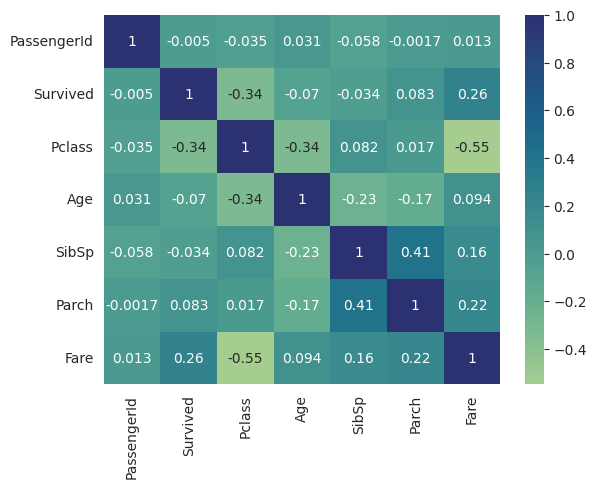

In [45]:
x = df.corr(numeric_only = True)

sns.heatmap(x, annot = True, cmap = "crest")
plt.show()

In [46]:
df.sample

<bound method NDFrame.sample of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [47]:
df.drop(columns = ["PassengerId", "Name", "Ticket", "Embarked"], inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [48]:
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])

In [49]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
352,0,3,1,15.0,1,1,7.2292
468,0,3,1,28.0,0,0,7.7250
260,0,3,1,28.0,0,0,7.7500
524,0,3,1,28.0,0,0,7.2292
146,1,3,1,27.0,0,0,7.7958


In [50]:
x = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [51]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [52]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [53]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [54]:
x

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.01546857],
       ...,
       [1.        , 0.        , 0.34656949, 0.125     , 0.33333333,
        0.04577135],
       [0.        , 1.        , 0.32143755, 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 0.39683338, 0.        , 0.        ,
        0.01512699]])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [56]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = KNeighborsClassifier()
model_4 = DecisionTreeClassifier()
model_5 = RandomForestClassifier()
model_6 = BaggingClassifier()
model_7 = ExtraTreesClassifier()
model_8 = AdaBoostClassifier()
model_9 = XGBClassifier()
model_10 = CatBoostClassifier()
model_11 = LGBMClassifier()

In [57]:
model_1.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred = model_1.predict(x_test)

In [59]:
print(confusion_matrix(y_test, y_pred))

[[87 22]
 [16 53]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [61]:
model_2.fit(x_train, y_train)

SVC()

In [62]:
y_pred = model_2.predict(x_test)

In [63]:
print(confusion_matrix(y_test, y_pred))

[[92 17]
 [19 50]]


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [70]:
model_4.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
print(confusion_matrix(y_test, y_pred))

[[90 19]
 [16 53]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [77]:
model_6.fit(x_train, y_train)

BaggingClassifier()

In [78]:
y_pred = model_6.predict(x_test)

In [79]:
print(confusion_matrix(y_test, y_pred))

[[87 22]
 [18 51]]


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [81]:
model_7.fit(x_train, y_train)

ExtraTreesClassifier()

In [82]:
y_pred = model_7.predict(x_test)

In [83]:
print(confusion_matrix(y_test, y_pred))

[[85 24]
 [15 54]]


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [86]:
model_8.fit(x_train, y_train)

AdaBoostClassifier()

In [87]:
y_pred = model_8.predict(x_test)

In [88]:
print(confusion_matrix(y_test, y_pred))

[[89 20]
 [13 56]]


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [90]:
model_9.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
y_pred = model_9.predict(x_test)

In [92]:
print(confusion_matrix(y_test, y_pred))

[[90 19]
 [17 52]]


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.73      0.75      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [94]:
model_10.fit(x_train, y_train)

Learning rate set to 0.008906
0:	learn: 0.6863332	total: 51.2ms	remaining: 51.1s
1:	learn: 0.6795646	total: 52ms	remaining: 26s
2:	learn: 0.6738916	total: 52.9ms	remaining: 17.6s
3:	learn: 0.6684861	total: 53.5ms	remaining: 13.3s
4:	learn: 0.6625586	total: 54.3ms	remaining: 10.8s
5:	learn: 0.6580225	total: 54.7ms	remaining: 9.07s
6:	learn: 0.6523450	total: 55.4ms	remaining: 7.87s
7:	learn: 0.6468864	total: 56.1ms	remaining: 6.96s
8:	learn: 0.6426360	total: 56.8ms	remaining: 6.26s
9:	learn: 0.6379731	total: 57.5ms	remaining: 5.7s
10:	learn: 0.6327669	total: 58.2ms	remaining: 5.24s
11:	learn: 0.6285215	total: 58.7ms	remaining: 4.84s
12:	learn: 0.6246461	total: 59.2ms	remaining: 4.49s
13:	learn: 0.6201667	total: 59.9ms	remaining: 4.22s
14:	learn: 0.6153065	total: 60.6ms	remaining: 3.98s
15:	learn: 0.6107201	total: 61.4ms	remaining: 3.78s
16:	learn: 0.6067255	total: 62.5ms	remaining: 3.61s
17:	learn: 0.6025166	total: 63.3ms	remaining: 3.45s
18:	learn: 0.5991651	total: 64ms	remaining: 3.31s

In [95]:
y_pred = model_10.predict(x_test)

In [96]:
print(confusion_matrix(y_test, y_pred))

[[91 18]
 [16 53]]


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.75      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [98]:
model_11.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [99]:
y_pred = model_11.predict(x_test)

In [100]:
print(confusion_matrix(y_test, y_pred))

[[92 17]
 [18 51]]


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [105]:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10, model_11]
models_names = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier',
                'XGBClassifier', 'CatBoostClassifier', 'LGBMClassifier']

# Calculate train and test scores:
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

# Measure model state:6
rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10  or train>=1.00:
        rate.append('overfite')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    elif train >= 0.80 and test < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'Ratio difference': ratio,
    'Evaluate model': rate,
})

# Show result:
model_score

,Model,Train score,Test score,Ratio difference,Evaluate model
0,LogisticRegression,79.32%,78.65%,0.67%,middle
1,SVC,81.15%,79.78%,1.38%,"high train, low test"
2,KNeighborsClassifier,87.06%,80.34%,6.72%,good
3,DecisionTreeClassifier,98.45%,78.65%,19.80%,overfite
4,RandomForestClassifier,98.31%,78.09%,20.22%,overfite
5,BaggingClassifier,97.33%,77.53%,19.80%,overfite
6,ExtraTreesClassifier,98.45%,78.09%,20.36%,overfite
7,AdaBoostClassifier,83.83%,81.46%,2.36%,good
8,XGBClassifier,96.34%,79.78%,16.57%,overfite
9,CatBoostClassifier,91.28%,80.9%,10.38%,overfite
